<small><font color=gray>Авторы соревнования: <a href="https://www.hse.ru/org/persons/223985242" target="_blank">Алексей Болдырев</a>, <a href="https://www.hse.ru/staff/mekarpov" target="_blank">Максим Карпов</a>, <a href="https://www.hse.ru/staff/ramazyant" target="_blank">Тигран Рамазян</a>, <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Олег Мельников</a> ©2024</font></small><hr style="margin:0;background-color:silver">


**[<font size=6>🔢Какая цифра?</font>](https://www.kaggle.com/competitions/whatsthenumber)**.

In [ ]:
# Альтернативный способ работы с соревнованием с использованием API kaggle
# from google.colab import drive; drive.mount('/content/drive')       # Раскомментируйте, если ваш kaggle.json хранится в корневой директории Google Drive

# !pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # Обновите пакет kaggle (полную документацию см. на https://www.kaggle.com/docs/api)
# !mkdir -p ~/.kaggle                                                 # Папка .kaggle должна содержать файл kaggle.json, чтобы исполняемый файл kaggle мог правильно аутентифицировать вас на kaggle.com
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log   # Сначала скачайте файл kaggle.json с сайта kaggle.com (на странице аккаунта) и поместите его в корень установленного Google Диска
# !cp kaggle.json ~/.kaggle/kaggle.json > log                         # Альтернативное расположение kaggle.json (без подключения к Google Drive)
# !chmod 600 ~/.kaggle/kaggle.json                                    # Предоставляйте полный доступ на чтение/запись к kaggle.json только владельцу аккаунта Kaggle
# !kaggle config set -n competition -v whatsthenumber                 # Название соревнования для следующих нескольких вызовов API kaggle
# !kaggle competitions download >> log                                # Загрузите набор данных соревнований в виде zip-файла
# !unzip -o *.zip >> log                                              # Набор данных соревнования копируется в виде одного файла и должен быть разархивирован
# !kaggle competitions leaderboard --show                             # Показать общедоступный рейтинг команд соревнования

ниже представлен код для отсчета времени выполнения модели

In [ ]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
RunTimeLimit, t0 = 120, time.time() # ограничение по времени работы вашей модели и время начала работы
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

class Timer():
    def __init__(self, lim:'RunTimeLimit'=120): self.t0, self.lim, _ = time.time(), lim, print(f'отсчет ⏳ начался. У вашей модели есть только {lim} секунд. Удачи!')
    def ShowTime(self):
      msg = f'Время выполнения {time.time()-self.t0:.0f} с'
      print(f'\033[91m\033[1m' + msg + f' > {self.lim} секунд на предельное время выполнения!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'display.max_colwidth', 100, 'display.precision', 2, 'display.max_rows', 4)

sFile = 'https://github.com/afonsky/DataAnalysisSummerSchool-2024/raw/main/trainYX.zip'
dfYX = pd.read_csv(sFile, compression='zip', index_col='id')
dfYX


,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,227,233,237,235,233,233,230,226,232,235,241,245,239,229,227,233,232,229,226,227,230,232,232,230,248,235,242,247,238,242,246,231,230,234,237,235,234,234,229,223,229,231,237,242,240,232,231,235,235,...,229,233,219,227,234,237,238,239,237,232,230,224,229,236,232,228,232,234,241,234,230,232,234,233,235,238,241,245,240,237,240,236,235,244,237,244,238,222,221,235,240,234,237,227,233,240,230,223,227,229
1,8,232,250,252,238,228,238,244,241,252,253,251,225,252,252,202,242,242,203,254,254,226,252,254,252,239,242,238,216,244,249,254,240,211,207,229,209,231,244,255,255,246,255,245,210,249,235,187,243,242,...,193,240,242,186,234,249,211,246,255,248,255,255,246,220,215,226,210,218,229,255,255,245,211,237,247,247,252,255,255,227,249,248,198,248,241,201,252,252,225,252,254,253,243,245,240,216,243,247,251,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,3,241,242,243,241,239,238,238,240,242,242,242,242,242,240,239,238,238,236,237,243,246,243,241,242,240,239,239,240,241,242,241,240,238,240,241,240,238,238,239,240,244,244,244,243,241,238,236,234,235,...,217,219,224,228,233,239,244,245,244,242,241,240,239,238,238,237,237,238,241,242,241,238,240,243,241,237,240,237,237,238,236,230,227,229,231,233,236,241,245,246,244,242,240,240,239,238,238,239,239,239
4999,3,248,244,242,246,249,248,248,250,250,247,244,244,247,249,249,248,246,247,248,249,249,249,249,248,251,252,250,245,240,241,247,254,253,248,246,249,250,249,249,252,249,249,249,250,249,248,245,243,246,...,251,246,248,244,244,249,250,248,246,248,253,250,247,245,242,241,245,250,249,247,245,247,249,251,250,248,250,249,236,244,249,245,252,246,252,243,243,252,251,241,244,255,250,247,247,250,249,245,244,246


В этом тестовом файле не хватает столбца с метками цифр, которые вам нужно предсказать.

In [ ]:
dfX = pd.read_csv('https://github.com/afonsky/DataAnalysisSummerSchool-2024/raw/main/testX.zip', compression='zip', index_col='id')
dfX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5000,242,242,242,241,240,239,238,237,235,235,236,235,233,232,231,231,235,234,234,236,239,238,234,230,234,232,230,230,232,235,235,235,240,240,240,240,239,237,236,235,232,233,234,234,234,233,232,230,235,234,...,233,234,234,235,234,232,232,234,238,240,232,234,234,232,233,236,234,230,230,229,229,229,230,231,233,235,233,232,233,234,233,231,232,233,229,233,235,234,233,233,233,233,234,238,238,235,234,236,235,231
5001,243,230,235,224,240,227,238,235,232,211,238,240,229,238,229,228,222,241,231,254,231,224,231,241,236,241,221,224,242,210,222,230,228,231,223,242,231,238,224,227,235,225,244,234,223,240,236,230,233,243,...,219,245,233,255,227,240,234,248,237,222,239,228,241,237,238,243,228,237,252,241,226,248,209,235,237,248,241,222,253,222,246,225,242,240,249,197,233,234,224,203,243,229,226,242,247,252,238,222,235,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,248,247,248,240,228,236,252,255,221,216,255,250,231,226,211,252,255,217,217,244,249,247,230,214,255,253,238,229,239,246,245,248,247,246,251,247,237,244,254,252,253,235,252,255,255,255,240,255,255,232,...,244,255,250,255,243,249,238,252,237,248,244,248,244,250,255,240,229,245,249,246,247,239,229,237,252,254,214,222,246,255,226,227,212,255,255,210,236,230,253,255,204,228,253,255,235,208,236,255,248,245
9999,234,233,233,234,236,237,237,236,234,231,230,233,233,231,232,236,236,234,235,238,242,243,240,237,236,235,234,234,235,236,238,240,235,233,232,233,235,235,234,232,232,229,229,233,233,230,231,234,233,232,...,235,237,237,237,237,237,235,233,231,229,233,235,238,239,237,234,233,233,236,237,236,233,229,228,231,234,237,237,235,233,232,233,235,238,238,239,240,239,236,234,233,234,228,232,236,238,237,235,233,233


Вот несколько первых цифр.

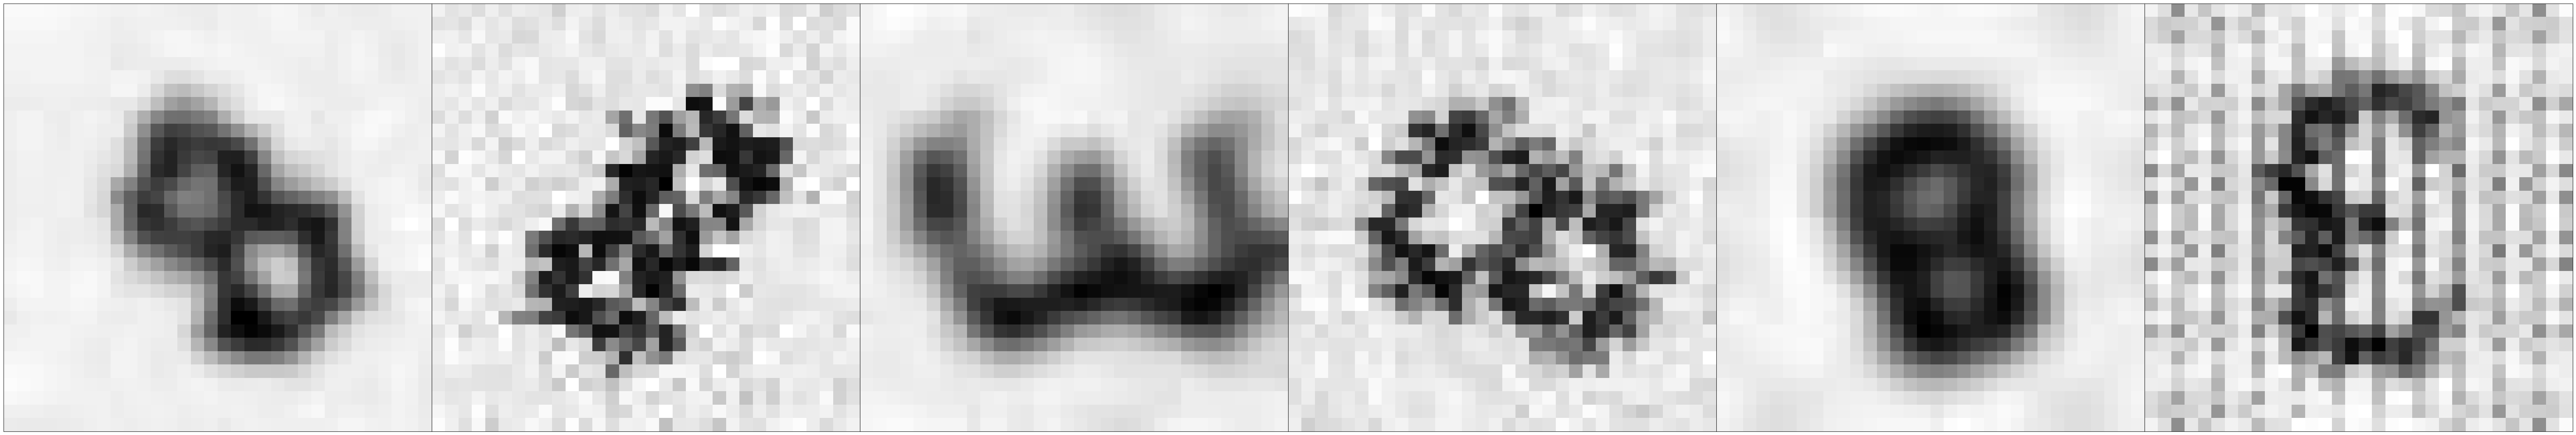

In [ ]:
X = dfX.values
n_col, w = 6, 32
_ = plt.figure(figsize=(6*12,12))
for i in range(n_col):
    ax = plt.subplot(1, n_col, i + 1)
    _ = plt.imshow(X[i,].reshape(w,w).astype('float'), cmap='gray')
    _, _ = plt.xticks([]), plt.yticks([]);
_ = plt.tight_layout(pad=0)
_ = plt.show()

In [ ]:
tmr = Timer()

отсчет ⏳ начался. У вашей модели есть только 120 секунд. Удачи!


<hr color=green size=40>

<font size=5>⏳</font> <strong><font color=green size=5>Ваш код, документация, идеи и отсчет времени - все записывается здесь...</font></strong>

<font color=green> **Раздел для участников соревнования** (между символами ⏳): добавьте сюда свой код и документацию.

Ниже приведена базовая модель, дающая результат `baseline` в лидерборде соревнования Какая цифра на kaggle.

In [ ]:
LR = LogisticRegression(random_state=0, n_jobs=-1).fit(dfYX.drop('y', axis=1), dfYX.y)
print(f'Точность (accuracy) в обучающем наборе: {LR.score(dfYX.drop("y", axis=1), dfYX.y):.3f}')
pY = dfX[['1']].rename(columns={'1':'y'}).copy()*0
pY['y'] = LR.predict(dfX)
pY.to_csv('baseline.csv')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Точность (accuracy) в обучающем наборе: 0.777


**МОДЕЛЬ УЧАСТНИКОВ**

Подключаем нужные нам библиотеки:


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Apparently you may use different seed values at each stage
seed_value = 25

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)

def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    tf.random.set_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(seed_value)

Random seed set as 25


Загружаем файлы

In [ ]:
train = pd.read_csv("trainYX.csv")
test = pd.read_csv("testX.csv")

Просматриваем содержимое

In [ ]:
train.head()

,id,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,3,227,233,237,235,233,233,230,226,232,235,241,245,239,229,227,233,232,229,226,227,230,232,232,230,248,235,242,247,238,242,246,231,230,234,237,235,234,234,229,223,229,231,237,242,240,232,231,235,...,229,233,219,227,234,237,238,239,237,232,230,224,229,236,232,228,232,234,241,234,230,232,234,233,235,238,241,245,240,237,240,236,235,244,237,244,238,222,221,235,240,234,237,227,233,240,230,223,227,229
1,1,8,232,250,252,238,228,238,244,241,252,253,251,225,252,252,202,242,242,203,254,254,226,252,254,252,239,242,238,216,244,249,254,240,211,207,229,209,231,244,255,255,246,255,245,210,249,235,187,243,...,193,240,242,186,234,249,211,246,255,248,255,255,246,220,215,226,210,218,229,255,255,245,211,237,247,247,252,255,255,227,249,248,198,248,241,201,252,252,225,252,254,253,243,245,240,216,243,247,251,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,8,180,215,228,218,217,223,228,235,213,222,225,212,172,211,239,233,231,239,210,169,210,227,222,207,233,229,227,221,220,230,218,186,196,223,233,226,225,227,233,244,233,236,227,222,199,230,244,244,...,239,243,240,241,226,199,230,237,240,232,247,234,227,225,222,226,220,201,186,218,230,220,221,227,229,233,207,231,226,206,176,212,233,236,237,237,213,177,206,217,221,214,243,224,216,222,230,233,214,182
4,4,8,193,202,214,224,232,239,246,250,249,249,246,238,227,218,214,212,215,216,220,228,238,245,247,246,250,246,239,232,224,214,202,193,196,203,213,221,228,234,239,244,242,242,240,234,226,219,216,215,...,213,212,213,216,221,228,234,240,245,248,244,243,237,227,218,211,202,194,193,202,214,224,232,239,246,250,248,249,247,240,230,220,215,214,207,214,224,232,238,242,245,247,248,248,242,231,221,214,203,194


Удаляем столбец id

In [ ]:
train = train.drop("id", axis=1)
test = test.drop("id", axis = 1)

Посмотрим размер входных данных

In [ ]:
train.shape
test.shape

(5000, 1025)

(5000, 1024)

Делим наши данные на 2 таблицы(на целевую y и на все остальное), приводим все данные в нужных столбцах к типу int32.

In [ ]:
train_y = train['y'].astype('int32')
train_x = train.drop(['y'], axis = 1).astype('int32')
test_x = test.astype('int32')
train_x.shape, train_y.shape

((5000, 1024), (5000,))

Сделаем нормирование данных, изначально пиксели находились в диапозоне [0;255]. После на промежутке[0;1]. Так для нейросети комфортнее обучаться. reshape(-1, 32, 32, 1) первое значение -1 означает автоматическую размерность по первой оси.

In [ ]:
train_x = train_x.values.reshape(-1, 32, 32, 1)
train_x = train_x / 255
test_x = test_x.values.reshape(-1, 32, 32, 1)
test_x = test_x / 255
train_x.shape, test_x.shape

((5000, 32, 32, 1), (5000, 32, 32, 1))

Преобразует вектор класса в 10тичную матрицу

In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, 10)
train_y.shape

(5000, 10)

Просматриваем как предыдущая ф-ия преобразовывает

In [ ]:
train_y[0:5,:]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

Создаем модель. Используем функцию Conv2D дважды для свертки изображения. Используем ReLU так как эта функция активации может увеличить скорость обучения. Затем используем Pooling для уменьшения размера карт активации. Затем используем Conv2D с другим количеством нейронов, используем padding='same', которая обрамляет матрицу нулями для сохранения размерности карты; strides - размер шага Pooling'а; pool_size - длина окна(уменьшит входное значение наполовину). Dropout нужен для того, чтобы нейросеть не была зависима от конкретных путей и узлов сети. Flatten() нужен для перехода от матрицы к вектору, так как Dense требует вектор. Dense() - класс полносвязного слоя. В конце используем activation='softmax' для распределения вероятностей 10 исходов. summary() - резюме нашей модели.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(32,32,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size= (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size= (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_414 (Conv2D)         (None, 30, 30, 32)        320       
                                                                 
 conv2d_415 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_207 (MaxPool  (None, 14, 14, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_416 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 conv2d_417 (Conv2D)         (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_208 (MaxPool  (None, 7, 7, 64)          0         
 ing2D)                                              

Создаем класс для проверки точности, при хорошем 'accuracy' останавливаем модель, она обучилась.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if (logs.get('accuracy') > 0.9999):
        print("\nReached 99.99%")
        self.model.stop_training = True

callbacks = myCallback()

Создаем собственный оптимайзер. Так как мы используем Adam, то мы должны прописать пару парметров для работы.
beta_1 отвечает за импульс, beta_2 отвечает за накопленные градиенты. epsilon нужен для того, чтобы не было деления на 0 при высчитывании формулы.

In [ ]:
Optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = 'Adam'
)

Компилируем модель. Используем loss такой, так как на выходе получаем 10 классов нейронов. Метрика самая базовая. batch_size = 50 подобрали, чтобы не перенагрузить компьютер, но чтобы было не так много epoch.

In [ ]:
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size = 50, epochs = 39, callbacks=[callbacks])

Epoch 1/39
100/100 [==============================] - 4s 8ms/step - loss: 0.8343 - accuracy: 0.5040
Epoch 2/39
100/100 [==============================] - 1s 7ms/step - loss: 0.6531 - accuracy: 0.6010
Epoch 3/39
100/100 [==============================] - 1s 7ms/step - loss: 0.3437 - accuracy: 0.8556
Epoch 4/39
100/100 [==============================] - 1s 7ms/step - loss: 0.1879 - accuracy: 0.9354
Epoch 5/39
100/100 [==============================] - 1s 7ms/step - loss: 0.1282 - accuracy: 0.9582
Epoch 6/39
100/100 [==============================] - 1s 7ms/step - loss: 0.1018 - accuracy: 0.9660
Epoch 7/39
100/100 [==============================] - 1s 7ms/step - loss: 0.0677 - accuracy: 0.9768
Epoch 8/39
100/100 [==============================] - 1s 7ms/step - loss: 0.0661 - accuracy: 0.9802
Epoch 9/39
100/100 [==============================] - 1s 7ms/step - loss: 0.0575 - accuracy: 0.9796
Epoch 10/39
100/100 [==============================] - 1s 7ms/step - loss: 0.0498 - accuracy: 0.9842

In [ ]:
# Epoch 40/40
# 100/100 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9991
#25
#30

в result записывается индекс самой высокой вероятности. В нашем случае 3 или 8. Создаем табличку.

In [ ]:
results = model.predict(test_x)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name="y")

157/157 [==============================] - 0s 2ms/step


Просматриваем таблицу предсказаний

In [ ]:
results

0       8
1       8
       ..
4998    3
4999    8
Name: y, Length: 5000, dtype: int64

Конкатенация данных

In [ ]:
submission = pd.concat([pd.Series(range(5000, 10000), name = "id"), results], axis = 1)
submission.to_csv("SampleSubmission2.csv", index=False)

<font size=5>⌛</font> <strong><font color=green size=5>Не превышайте ограничение времени, выделенного на работу вашей модели!</font></strong>

<hr color=green size=40>


In [ ]:
tmr.ShowTime()    # Измерьте время работы вашего кода. Не удаляйте этот код. Используйте как последнюю ячейку в тетрадке.

Время выполнения 88 с
